In [1]:
import python_inventory as pyinv
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_iris, Y_iris = datasets.load_iris(return_X_y=True)

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)
pca.fit(X_iris)
X = pca.transform(X_iris)

In [5]:
Y1 = np.array([(1 if y==0 else -1) for y in Y_iris])
Y2 = np.array([(1 if y==1 else -1) for y in Y_iris])
Y3 = np.array([(1 if y==2 else -1) for y in Y_iris])

In [6]:
print(Y1.shape, Y_iris.shape)

(150,) (150,)


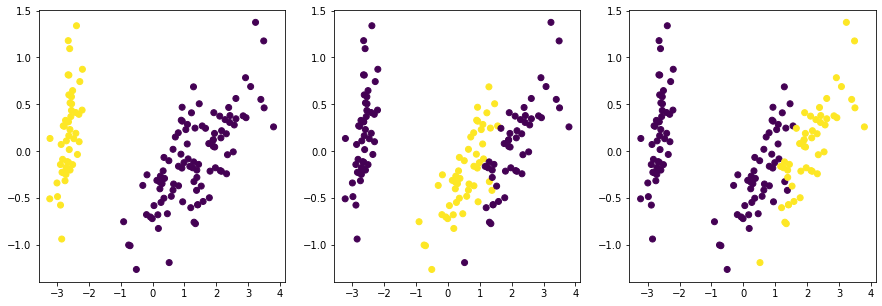

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=Y1)
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=Y2)
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=Y3)
plt.show()

In [8]:
class Ellipsoidal(pyinv.Model):
    #
    def __init__(self, param = None):
        if param is None:
            self.param = np.zeros(5, 'd')
        else:
            self.param = np.array(param, 'd')
        self.n_param = 5
    #
    def init_param(self):
        self.param[:] = np.random.random(5)
    #
    def evaluate(self, X):
        x1, x2 = X
        a11, a12, a22, a1, a2 = self.param
        return a11 * x1 * x1 + a22 * x2 * x2 + 2 * a12 * x1 * x2 + 2*a1 * x1 + 2*a2 * x2 - 1
    #
    def gradient(self, X):
        x1, x2 = X
        a11, a12, a22, a1, a2 = self.param
        g11 = x1 * x1
        g22 = x2 * x2
        g12 = 2 * x1 * x2
        g1 = 2 * x1
        g2 = 2 * x2
        return np.array([g11, g12, g22, g1, g2], 'd')


282 [ 0.13391312 -0.13603634  0.4458021  -0.43726307  0.64453756]


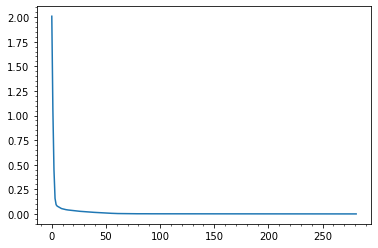

In [9]:
elp1 = Ellipsoidal()
elp1.init_param()

loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk1 = pyinv.Risk(elp1, loss_hinge, am)

gd1 = pyinv.GradientDescent(risk1)
gd1.fit(X, Y1)
print(gd1.K, elp1.param)

plt.plot(gd1.rvals)
plt.minorticks_on()
plt.show()

2000 [-3.7682532   3.36938662 -0.36144215  2.8645577  -3.06405959]


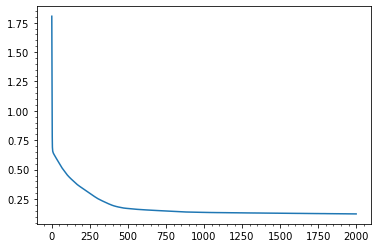

In [10]:
elp2 = Ellipsoidal()
elp2.init_param()

loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk2 = pyinv.Risk(elp2, loss_hinge, am)

gd2 = pyinv.GradientDescent(risk2, n_iter=2000)
gd2.fit(X, Y2)
print(gd2.K, elp2.param)

plt.plot(gd2.rvals)
plt.minorticks_on()
plt.show()

2000 [ 0.22000454 -0.19495732 -0.46510422  0.36996095 -0.07022858]


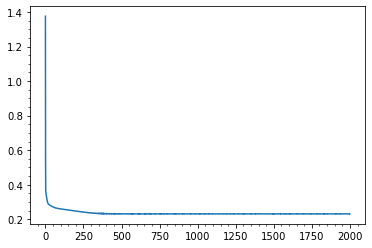

In [11]:
elp3 = Ellipsoidal()
elp3.init_param()

loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk3 = pyinv.Risk(elp3, loss_hinge, am)

gd3 = pyinv.GradientDescent(risk3, n_iter=2000)
gd3.fit(X, Y3)
print(gd3.K, elp3.param)

plt.plot(gd3.rvals)
plt.minorticks_on()
plt.show()

In [12]:
Y1p = np.sign(elp1.evaluate_all(X))
Y2p = np.sign(elp2.evaluate_all(X))
Y3p = np.sign(elp3.evaluate_all(X))

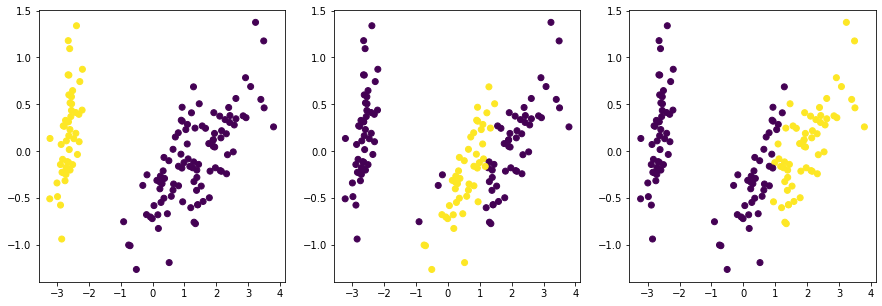

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=Y1p)
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=Y2p)
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=Y3p)
plt.show()

In [14]:
def eval_model_2d(mod, xmin, xmax, ymin, ymax):
    xrange = np.linspace(xmin,xmax,100)
    yrange = np.linspace(ymin,ymax,100)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    Z = mod.evaluate_all(XY)
    ZZ = Z.reshape(XX.shape)    
    return ZZ

In [15]:
ZZ1 = eval_model_2d(elp1, -4, 4, -1.5, 1.5)
ZZ2 = eval_model_2d(elp2, -4, 4, -1.5, 1.5)
ZZ3 = eval_model_2d(elp3, -4, 4, -1.5, 1.5)

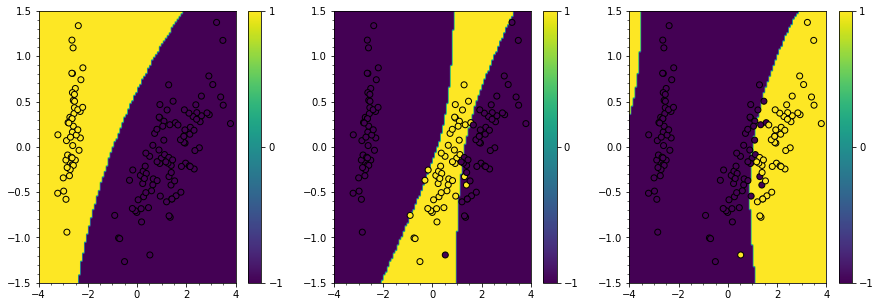

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=Y1, edgecolors='k')
cs = plt.imshow(np.sign(ZZ1), origin='lower', 
                extent=(-4, 4, -1.5, 1.5), aspect='auto')
plt.colorbar(cs, ticks=(-1,0,1))
plt.minorticks_on()
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=Y2, edgecolors='k')
cs = plt.imshow(np.sign(ZZ2), origin='lower', 
                extent=(-4, 4, -1.5, 1.5), aspect='auto')
plt.colorbar(cs, ticks=(-1,0,1))
plt.minorticks_on()
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=Y3, edgecolors='k')
cs = plt.imshow(np.sign(ZZ3), origin='lower', 
                extent=(-4, 4, -1.5, 1.5), aspect='auto')
plt.colorbar(cs, ticks=(-1,0,1))
plt.minorticks_on()
plt.show()